<a href="https://colab.research.google.com/github/ShivamGuptaaaa/CODSOFT/blob/main/Task_2_Codsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 2: MOVIE RATING PREDICTION WITH PYTHON**

   ## Name: Shivam Gupta

   ## Batch: January

   ## Domain: Data Science

   ## Project Aim: Build a model that predicts the rating of a movie based on features like genre, director, and actors.


In [ ]:
!pip install scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import chardet
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


In [ ]:
with open('/content/drive/MyDrive/Codsoft Dataset/Task 2 MOVIE RATING PREDICTION WITH PYTHON/IMDb Movies India.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [ ]:
movie = pd.read_csv('/content/drive/MyDrive/Codsoft Dataset/Task 2 MOVIE RATING PREDICTION WITH PYTHON/IMDb Movies India.csv', encoding=encoding)


In [ ]:
movie.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
movie.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


**Data Flirting and Pre-processing Data**

In [ ]:
movie.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
movie.shape #Rows 15509 and columns 10

(15509, 10)

In [ ]:
movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

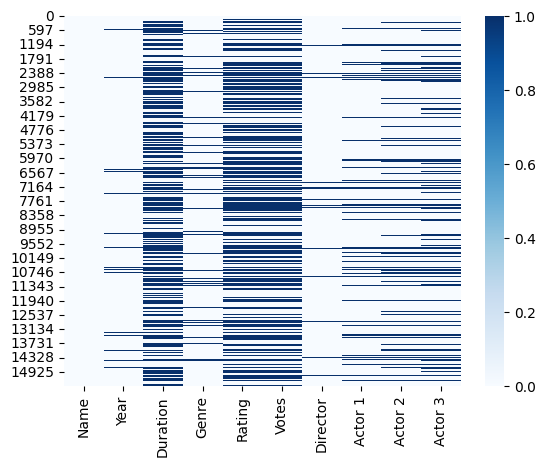

In [ ]:
sns.heatmap(movie.isnull(), cmap="Blues")

In [ ]:
movie.dropna(inplace=True) # drop duplicate value

In [ ]:
movie.shape

(5659, 10)

In [ ]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
# Top rated movie by using matplotlib
movie_name_rating = movie[['Name','Rating']]
print(movie_name_rating.head())

                                 Name  Rating
1  #Gadhvi (He thought he was Gandhi)     7.0
3                             #Yaaram     4.4
5                ...Aur Pyaar Ho Gaya     4.7
6                           ...Yahaan     7.4
8                  ?: A Question Mark     5.6


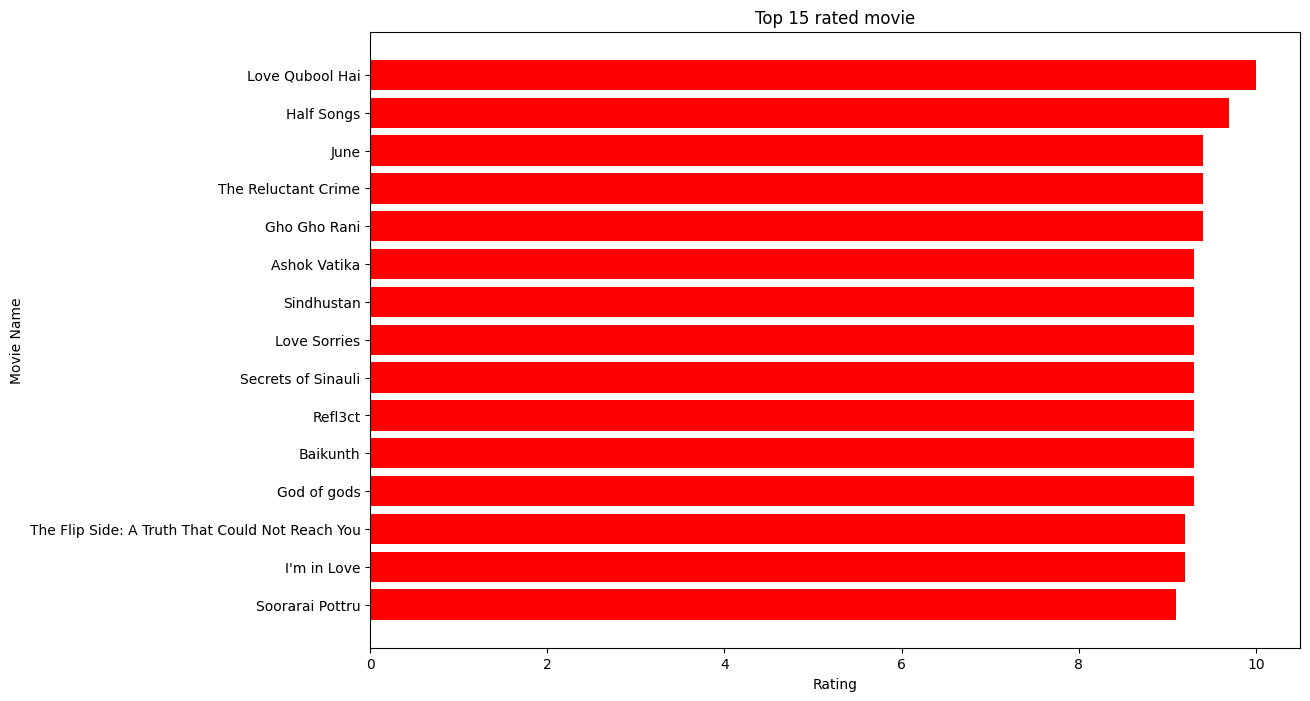

In [ ]:
# creating graph
top_rated_movie = movie.sort_values(by='Rating', ascending=False).head(15)
plt.figure(figsize = (12,8))
plt.barh(top_rated_movie['Name'], top_rated_movie['Rating'], color='red')
plt.gca().invert_yaxis()
plt.xlabel('Rating')  #x-axis = rating
plt.ylabel('Movie Name')  # y-axis = movie name
plt.title('Top 15 rated movie')
plt.show()

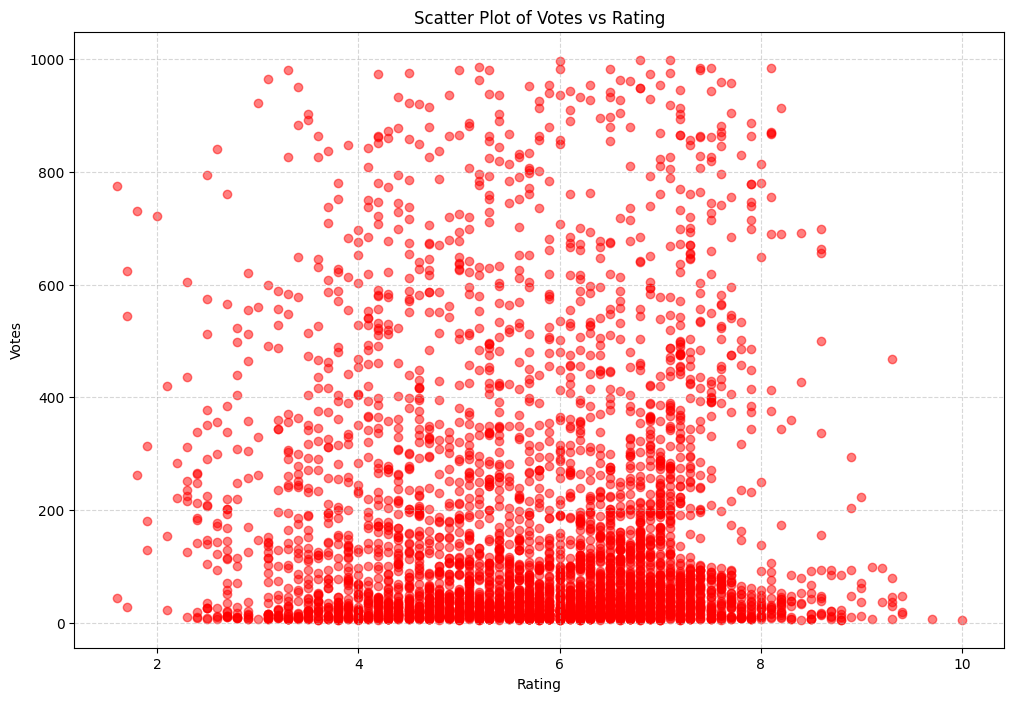

In [ ]:
# Now we see Vote vs Rating

movie['Votes'] = pd.to_numeric(movie['Votes'], errors = 'coerce')
plt.figure(figsize=(12, 8))
plt.scatter(movie['Rating'],movie['Votes'], alpha= 0.5, color = 'r')
plt.title('Scatter Plot of Votes vs Rating')
plt.xlabel('Rating')  # x-axis = Rating
plt.ylabel('Votes')  # y-axis = Votes
plt.grid(True,linestyle= '--', alpha=0.5)
plt.show()





In [ ]:
movie.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,NaN,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


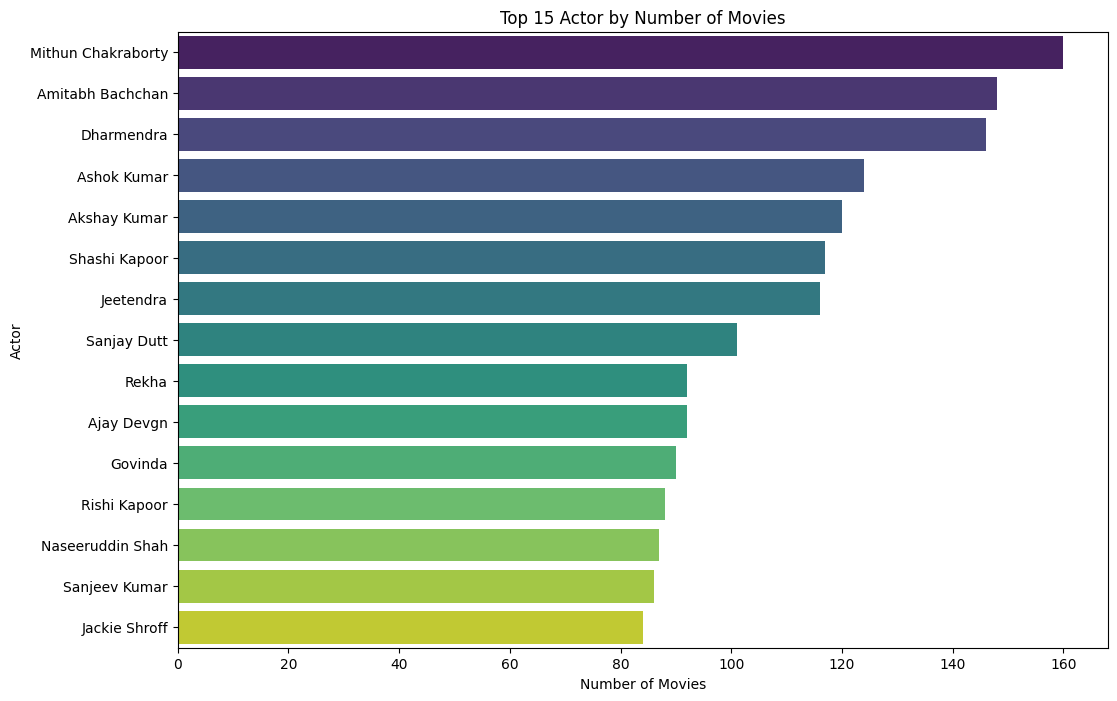

In [ ]:
# concat actors

actor_list = pd.concat([movie['Actor 1'], movie['Actor 2'], movie['Actor 3']])
actor_count = actor_list.value_counts().reset_index()
# actor_count.head()
actor_count.columns = ['Actor', 'Number of Movies']
plt.figure(figsize= (12,8))
sns.barplot(x = 'Number of Movies', y = 'Actor', data=actor_count.head(15), palette='viridis' )
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 15 Actor by Number of Movies')
plt.show()

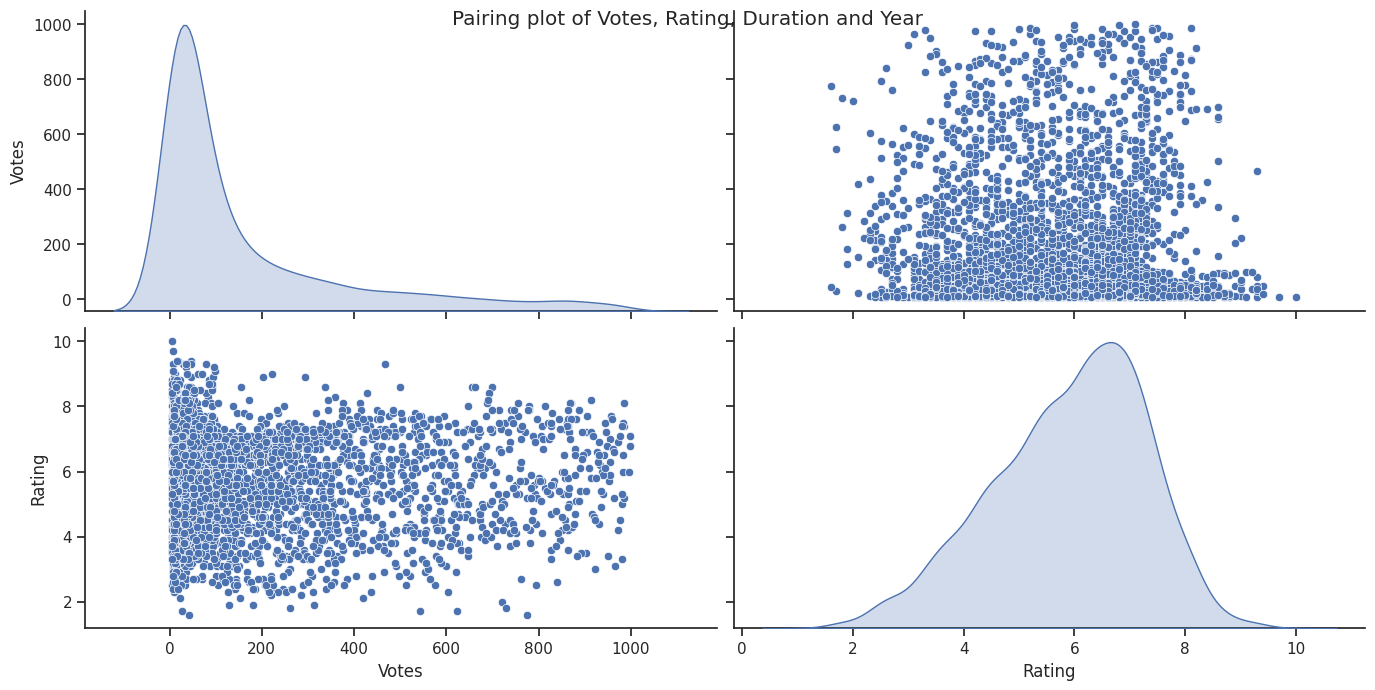

In [ ]:
interested_column = ['Votes', 'Rating','Duration','Year']
sns.set(style = 'ticks')
sns.pairplot(movie[interested_column], diag_kind= 'kde', markers = 'o', palette='Reds', height = 3.5, aspect = 2)
plt.suptitle("Pairing plot of Votes, Rating, Duration and Year")
plt.show()

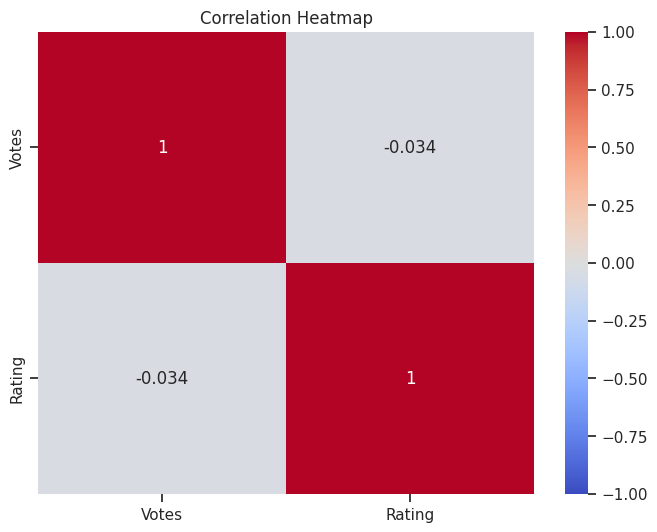

In [ ]:
numeric_column = ['Votes', 'Rating','Duration','Year']
correlation_matrix = movie[numeric_column].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', vmin =-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

# **Feature Engineering**

In [ ]:
movie_sorted = movie.sort_values(by='Votes', ascending = False)
movie_sorted['Vote_count_percentile'] = movie_sorted['Votes'].rank(pct= True) * 100
movie_sorted.reset_index(drop = True, inplace=True)
movie_sorted[['Name','Votes','Vote_count_percentile']]

,Name,Votes,Vote_count_percentile
0,Satyam Shivam Sundaram: Love Sublime,999.0,100.000000
1,Hera Pheri,998.0,99.976695
2,Kurukshetra,996.0,99.953391
3,Dishkiyaoon,986.0,99.930086
4,Kadvi Hawa,985.0,99.895129
...,...,...,...
5654,Ziddi,NaN,NaN
5655,Zila Ghaziabad,NaN,NaN
5656,Zinda,NaN,NaN
5657,Zindagi Na Milegi Dobara,NaN,NaN


In [ ]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,NaN,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
movie = movie.dropna(subset = ['Votes'])  # drop empty votes rows

In [ ]:
movie.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
movie.shape

(4291, 10)

#**Model Test and Model Training**

In [ ]:
 movie['Year'] = movie['Year'].astype(str)
 movie['Duration'] = movie['Duration'].astype(str)
 movie['Year'] = movie['Year'].str.extract('(\d+)').astype(float)
 movie['Duration'] = movie['Duration'].str.extract('(\d+)').astype(float)
 X = movie[['Year','Duration','Votes']]
 y = movie['Rating']
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
model = LinearRegression()

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy="mean")
imputer.fit(X_train)
X_train = imputer.transform(X_train)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
imputer = SimpleImputer(strategy="mean")
X_test = imputer.fit_transform(X_test)

y_predict = model.predict(X_test)

In [ ]:
mean_error = mean_absolute_error(y_test, y_predict)
square_error = mean_squared_error(y_test, y_predict, squared = False)
r2 = r2_score(y_test, y_predict)
print(f'Mean Absolute Error: {mean_error}')
print(f'Root Mean Square error: {square_error}')
print(f'R-square (R2) Score:{r2}')

Mean Absolute Error: 1.1437193721871082
Root Mean Square error: 1.4050617651367017
R-square (R2) Score:0.0026357659715251502


#**Prediction in Visualization for better understanding**


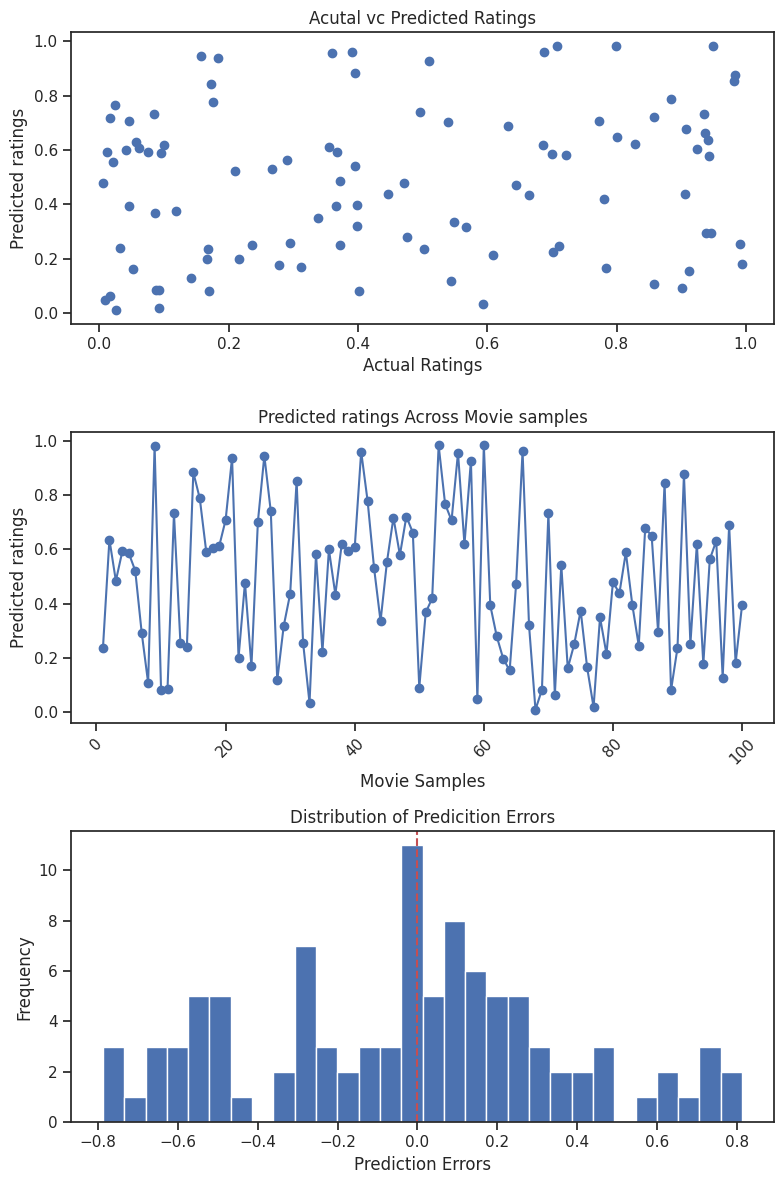

In [ ]:
y_test = np.random.rand(100)
y_predict = np.random.rand(100)
errors = y_test - y_predict
fig, axs = plt.subplots(3,1, figsize = (8,12))

axs[0].scatter(y_test, y_predict)
axs[0].set_xlabel("Actual Ratings")
axs[0].set_ylabel("Predicted ratings")
axs[0].set_title("Acutal vc Predicted Ratings")

movie_samples = np.arange(1, len(y_predict) + 1)
axs[1].plot(movie_samples, y_predict, marker = 'o', linestyle = '-')
axs[1].set_xlabel("Movie Samples")
axs[1].set_ylabel("Predicted ratings")
axs[1].set_title("Predicted ratings Across Movie samples")
axs[1].tick_params(axis='x', rotation = 45)

axs[2].hist(errors, bins = 30)
axs[2].set_xlabel("Prediction Errors")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of Predicition Errors")
axs[2].axvline(x=0, color = 'r', linestyle ='--')
plt.tight_layout()
plt.show()